<h2 align='center'> <a>1.Understanding the business problem</h2>

#### BUSINESS CONTEXT:
With the enormous growth of computer networks usage and the huge increase in the number of
applications running on top of it, network security is becoming increasingly more important. All
the computer systems suffer from security vulnerabilities which are both technically difficult and
economically costly to be solved by the manufacturers. 
##### Therefore, the role of Intrusion Detection Systems (IDSs),
as special-purpose devices to detect anomalies and attacks in the network, is
becoming more important.

    The research in the intrusion detection field has been mostly focused on anomaly-based and
    misusebased detection techniques for a long time. While misuse-based detection is generally
    favored in commercial products due to its predictability and high accuracy, in academic research
    anomaly detection is typically conceived as a more powerful method due to its theoretical
    potential for addressing novel attacks.

    Conducting a thorough analysis of the recent research trend in anomaly detection, one will
    encounter several machine learning methods reported to have a very high detection rate of 98%
    while keeping the false alarm rate at 1%. However, when we look at the state of the art IDS
    solutions and commercial tools, there is no evidence of using anomaly detection approaches, and
    practitioners still think that it is an immature technology. To find the reason of this contrast, lots
    of research was done done in anomaly detection and considered various aspects such as learning
    and detection approaches, training data sets, testing data sets, and evaluation methods.

#### BUSINESS PROBLEM:
Your task to build network intrusion detection system to detect anamolies and attacks in the
network. There are two problems.
1. Binomial Classification: Activity is normal or attack
2. Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R
Please note that, currently the dependent variable (target variable) is not definied explicitly.
However, you can use attack variable to define the target variable as required.


#### <a>Importing the necessary library.

In [1]:
import pandas as pd             
import numpy as np              

import seaborn as sns           

import matplotlib.pyplot as plt 
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

# Warnings filter controls whether warnings are ignored, displayed, or turned into errors
import warnings            
warnings.filterwarnings('ignore')

<h2 align='center'><a>2.Exploratory Data Analysis(EDA)</h2>

#### <a>Import the data

In [2]:
columns_data = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
                 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 
                 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack','last_flag']

# Training dataset
train_new = pd.read_csv('D:\\Python\\Advance\\Case study-Final\\3. Network Intrusion Detection System\\NSL_Dataset\\Train.txt', sep = ',', header = None, names = columns_data)  

 # Testing dataset
test_new = pd.read_csv('D:\\Python\\Advance\\Case study-Final\\3. Network Intrusion Detection System\\NSL_Dataset\\Test.txt', sep = ',', header = None, names = columns_data) 

#### <a>Making friendship with data after importing.

In [3]:
train_new.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
test_new.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [6]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

In [7]:
train_new.isnull().sum() ### Checking the missing values.

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
test_new.isnull().sum() ### Checking the missing values.

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
# import pandas_profiling  
# pandas_profiling.ProfileReport(train_new)
# pandas_profiling.ProfileReport(test_new)

#### Create UDFs

In [10]:
# Use a general function that returns multiple values-

# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                        x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [11]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [12]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode().iloc[0])
    return x

#### <a>Data Inspection

#### Train Dataset

In [13]:
# Splitting continous and categorical var-
train_new_conti_vars = train_new.loc[:, (train_new.dtypes == 'float64') | (train_new.dtypes == 'int64')]
train_new_cat_vars = train_new.loc[:, train_new.dtypes == 'object']

In [14]:
train_new_cat_vars.head() ### These are the objects.

,protocol_type,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal


In [15]:
#checking P1 & Min(Outliers),P99 & Max(Outliers),Mean Median,NMISS(for missing values).

train_new_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.14,0.00,2604.52,6.783500e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.74,44.00,5870331.18,3.446079e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.11,0.00,4021269.15,1.617061e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.00,0.00,0.01,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.02,0.00,0.25,6.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.00,0.00,0.01,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.20,0.00,2.15,4.620000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.00,0.00,0.05,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.40,0.00,0.49,2.400000e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.28,0.00,23.94,5.732200e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [16]:
#checking Mode,Freq,NMISS,Percent,Count.

train_new_cat_vars.apply(categorical_var_summary).T.round(2)

,N,NMISS,MODE,FREQ,PERCENT
protocol_type,125973,0,tcp,102689,81.52
service,125973,0,http,40338,32.02
flag,125973,0,SF,74945,59.49
attack,125973,0,normal,67343,53.46


#### Test Dataset

In [17]:
# Splitting continous and categorical var-
test_new_conti_vars = test_new.loc[:, (test_new.dtypes == 'float64') | (test_new.dtypes == 'int64')]
test_new_cat_vars = test_new.loc[:, test_new.dtypes == 'object']

In [18]:
test_new_cat_vars.head(5) ## These are the objects.

,protocol_type,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,private,REJ,neptune
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,saint
4,tcp,telnet,RSTO,mscan


In [19]:
#checking P1 & Min(Outliers),P99 & Max(Outliers),Mean Median,NMISS(for missing values).

test_new_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22544.0,0.0,4.933959e+06,218.86,0.00,1407.18,1.980146e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.57,57715.0
src_bytes,22544.0,0.0,2.343550e+08,10395.45,54.00,472786.43,2.235270e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.00,62825648.0
dst_bytes,22544.0,0.0,4.635089e+07,2056.02,46.00,21219.30,4.502586e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.10,8314.00,26032.04,1345927.0
land,22544.0,0.0,7.000000e+00,0.00,0.00,0.02,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
wrong_fragment,22544.0,0.0,1.900000e+02,0.01,0.00,0.14,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
urgent,22544.0,0.0,1.600000e+01,0.00,0.00,0.04,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
hot,22544.0,0.0,2.376000e+03,0.11,0.00,0.93,8.600000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,101.0
num_failed_logins,22544.0,0.0,4.880000e+02,0.02,0.00,0.15,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.0
logged_in,22544.0,0.0,9.969000e+03,0.44,0.00,0.50,2.500000e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.0
num_compromised,22544.0,0.0,2.703000e+03,0.12,0.00,7.27,5.285000e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,796.0


In [20]:
#checking Mode,Freq,NMISS,Percent,Count.

test_new_cat_vars.apply(categorical_var_summary).T.round(2)

,N,NMISS,MODE,FREQ,PERCENT
protocol_type,22544,0,tcp,18880,83.75
service,22544,0,http,7853,34.83
flag,22544,0,SF,14875,65.98
attack,22544,0,normal,9711,43.08


#### <a>DATA PREPARATION

In [21]:
# Clipping Outliers-

train_new_conti_vars = train_new_conti_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(.10), upper = x.quantile(.90)))
test_new_conti_vars = test_new_conti_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(.10), upper = x.quantile(.90)))

#### <a>Identify and marking target variable-

In [22]:
train_new_cat_vars.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [23]:
test_new_cat_vars.attack.unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [24]:
### For activity like attack-

In [25]:
train_new_cat_vars['activity'] = np.where((train_new_cat_vars['attack'].isin(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop', 
                                           'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd', 'ftp_write', 
                                           'multihop', 'rootkit', 'buffer_overflow', 'imap', 'warezmaster', 'phf', 
                                           'land', 'loadmodule', 'spy', 'perl']) == True), 1, 0)
test_new_cat_vars['activity'] = np.where((test_new_cat_vars['attack'].isin(['neptune', 'saint', 'mscan', 'guess_passwd',
                                                                            'smurf','apache2', 'satan', 'buffer_overflow',
                                                                            'back', 'warezmaster','snmpgetattack', 
                                                                            'processtable', 'pod', 'httptunnel', 'nmap', 
                                                                            'ps','snmpguess', 'ipsweep', 'mailbomb', 'portsweep',
                                                                            'multihop','named', 'sendmail', 'loadmodule', 
                                                                            'xterm', 'worm', 'teardrop','rootkit', 'xlock', 
                                                                            'perl', 'land', 'xsnoop', 'sqlattack','ftp_write',
                                                                            'imap', 'udpstorm', 'phf']) == True), 1, 0)

In [26]:
# Prints the frequency of 'normal' vs 'attack'

train_new_cat_vars['activity'].value_counts()

0    67343
1    58630
Name: activity, dtype: int64

In [27]:
test_new_cat_vars['activity'].value_counts()

1    12833
0     9711
Name: activity, dtype: int64

In [28]:
train_new_cat_vars['activity'].head()

0    0
1    0
2    1
3    0
4    0
Name: activity, dtype: int32

In [29]:
test_new_cat_vars['activity'].head()

0    1
1    1
2    0
3    1
4    1
Name: activity, dtype: int32

### <a>DATA VISUALIZATION

#### train_new_cat_vars-Visualization

In [30]:
train_new_cat_vars.columns

Index(['protocol_type', 'service', 'flag', 'attack', 'activity'], dtype='object')

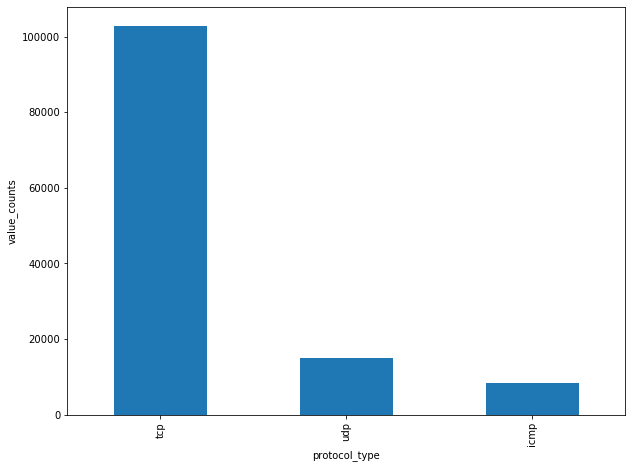

In [31]:
# Bar Chart-

train_new_cat_vars['protocol_type'].value_counts().plot.bar()
plt.xlabel('protocol_type')
plt.ylabel('value_counts')
plt.show()

Text(0, 0.5, 'value_counts')

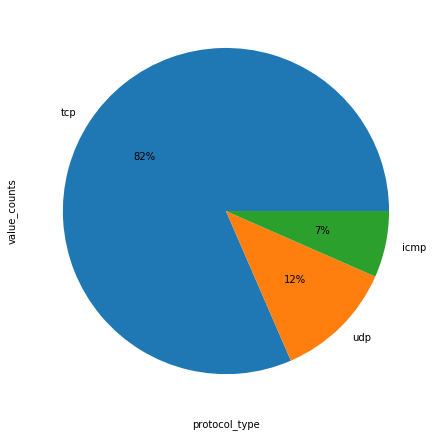

In [32]:
### Pie Chart Comparision 

train_new_cat_vars['protocol_type'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.xlabel('protocol_type')
plt.ylabel('value_counts') 

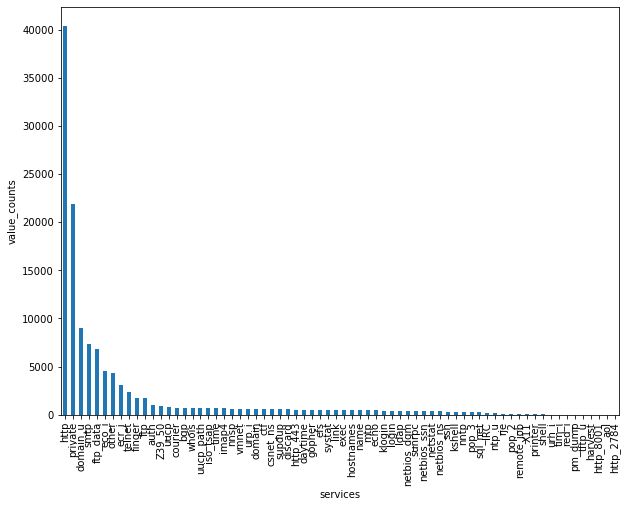

In [33]:
train_new_cat_vars['service'].value_counts().plot.bar()
plt.xlabel('services')
plt.ylabel('value_counts')
plt.show()

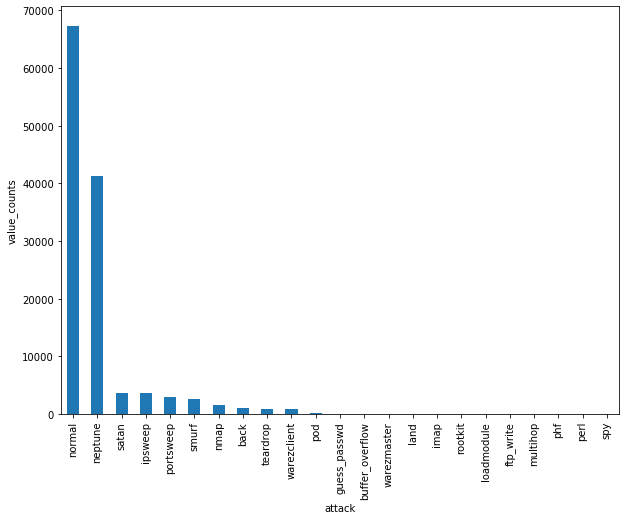

In [34]:
train_new_cat_vars['attack'].value_counts().plot.bar()
plt.xlabel('attack')
plt.ylabel('value_counts')
plt.show()

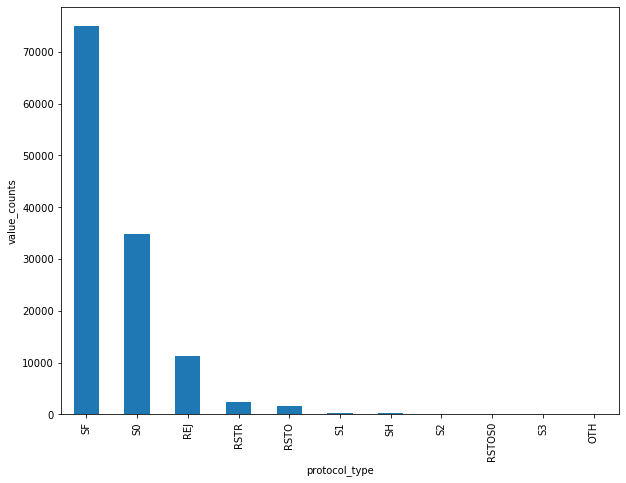

In [35]:
# The below bargraph shows the Protocol used in the connection

train_new_cat_vars['flag'].value_counts().plot.bar()
plt.xlabel('protocol_type')
plt.ylabel('value_counts')
plt.show()

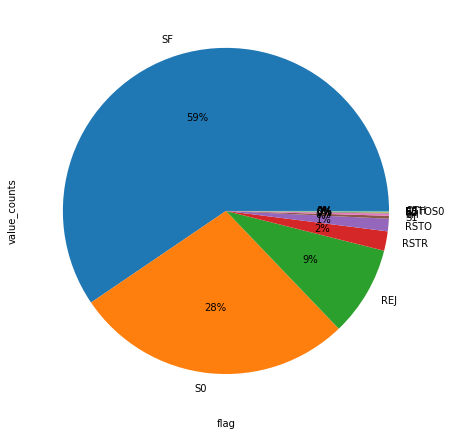

In [36]:
train_new_cat_vars['flag'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.xlabel('flag')
plt.ylabel('value_counts')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0E5BF830>],
      dtype=object)

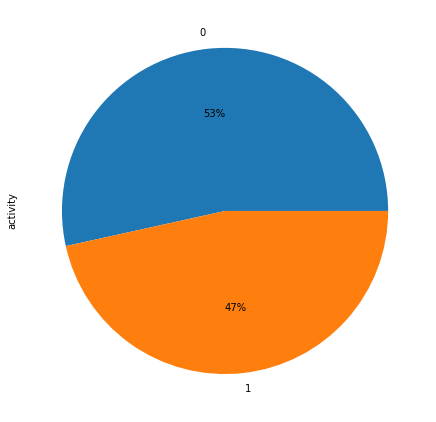

In [37]:
# The below pichart shows percentage of the Activity is normal or attack

train_new_cat_vars['activity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')

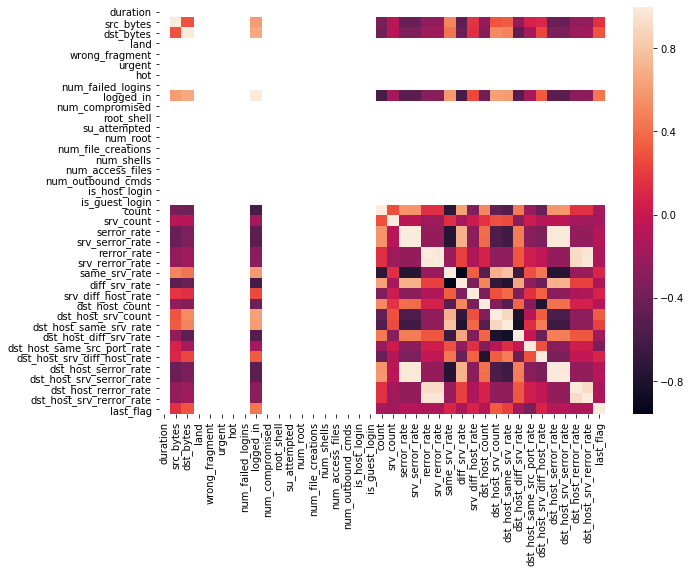

In [38]:
sns.heatmap(train_new_conti_vars.corr())

#### test_new_cat_vars-Visualization

In [39]:
test_new_cat_vars.columns

Index(['protocol_type', 'service', 'flag', 'attack', 'activity'], dtype='object')

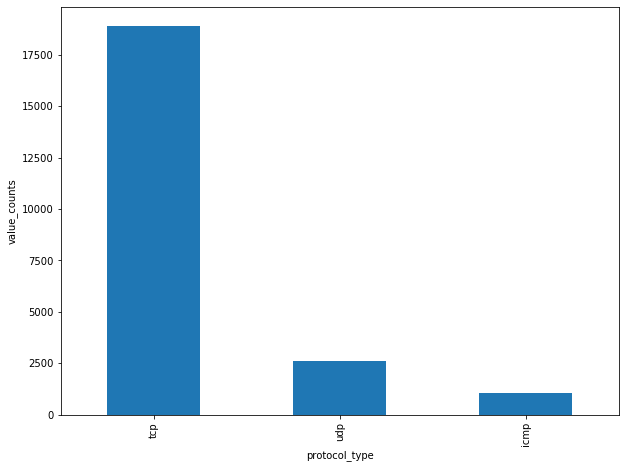

In [40]:
test_new_cat_vars['protocol_type'].value_counts().plot.bar()
plt.xlabel('protocol_type')
plt.ylabel('value_counts')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0DF52B10>],
      dtype=object)

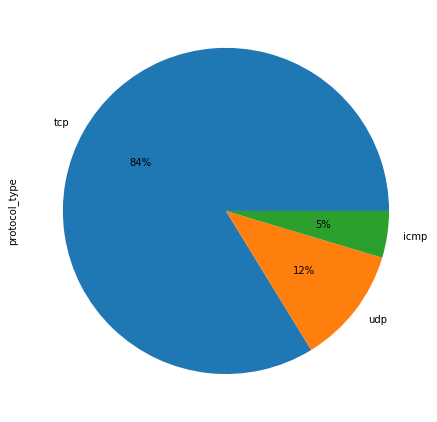

In [41]:
### Pie Chart Comparision 

test_new_cat_vars['protocol_type'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')

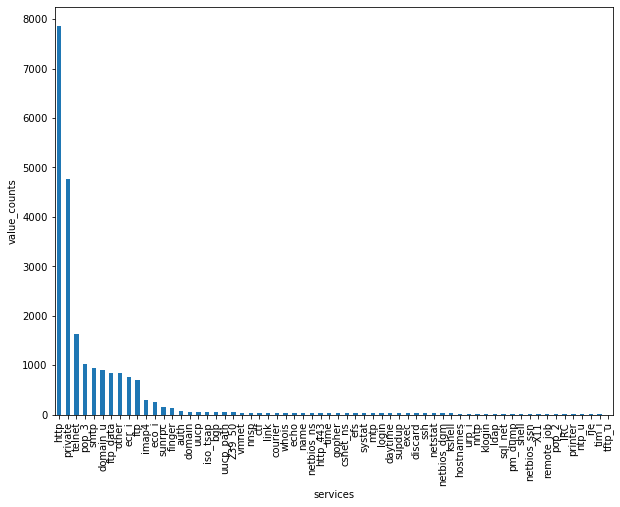

In [42]:
test_new_cat_vars['service'].value_counts().plot.bar()
plt.xlabel('services')
plt.ylabel('value_counts')
plt.show()

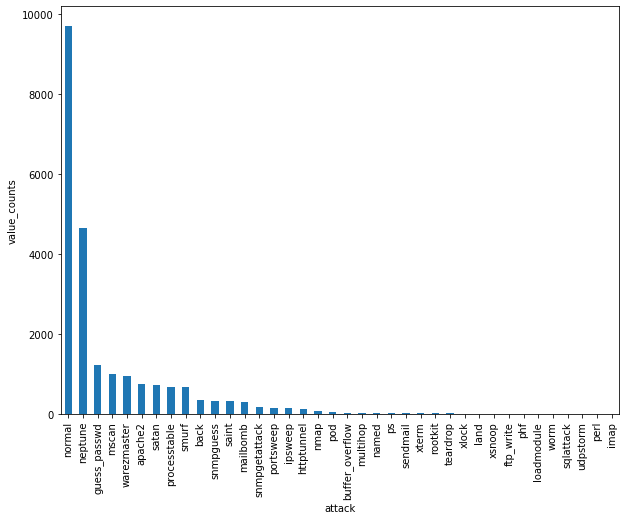

In [43]:
test_new_cat_vars['attack'].value_counts().plot.bar()
plt.xlabel('attack')
plt.ylabel('value_counts')
plt.show()

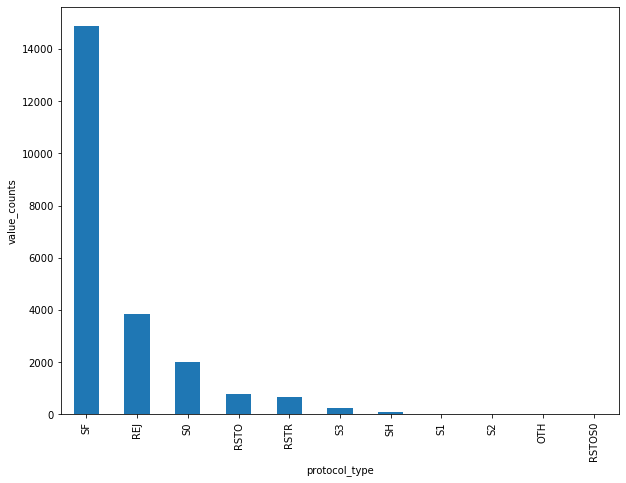

In [44]:
# The below bargraph shows the Protocol used in the connection

test_new_cat_vars['flag'].value_counts().plot.bar()
plt.xlabel('protocol_type')
plt.ylabel('value_counts')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0F011B30>],
      dtype=object)

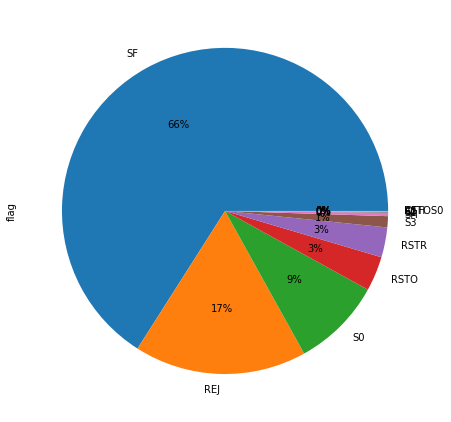

In [45]:
test_new_cat_vars['flag'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0F174730>],
      dtype=object)

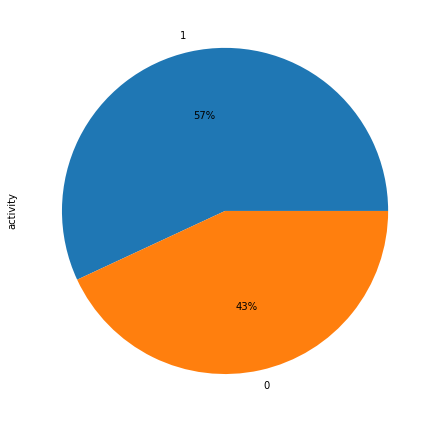

In [46]:
# The below pichart shows percentage of the Activity is normal or attack

test_new_cat_vars['activity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')

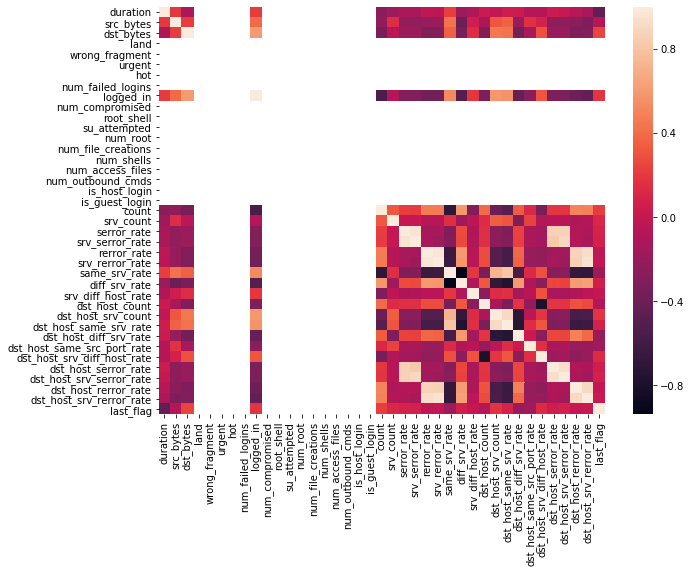

In [47]:
sns.heatmap(test_new_conti_vars.corr())

#### <a>DUMMY VARIABLES

#### For Train Dataset-

In [48]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [49]:
for c_feature in ['protocol_type', 'flag']:
    train_new_cat_vars[c_feature] = train_new_cat_vars[c_feature].astype('category')
    train_new_cat_vars = create_dummies(train_new_cat_vars, c_feature)

In [50]:
train_new_cat_vars = train_new_cat_vars[train_new_cat_vars.columns.difference(['service', 'attack'])]

In [51]:
# Getting one consolidated dataset
train_final = pd.concat([train_new_conti_vars, train_new_cat_vars], axis = 1)

In [52]:
train_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,0,491,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,146,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,232,3375.8,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,199,420.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


#### For Test Dataset-

In [53]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [54]:
for c_feature in ['protocol_type', 'flag']:
    test_new_cat_vars[c_feature] = test_new_cat_vars[c_feature].astype('category')
    test_new_cat_vars = create_dummies(test_new_cat_vars, c_feature)

In [55]:
test_new_cat_vars = test_new_cat_vars[test_new_cat_vars.columns.difference(['service', 'attack'])]

In [56]:
# Getting one consolidated dataset
test_final = pd.concat([test_new_conti_vars, test_new_cat_vars], axis = 1)

In [57]:
test_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1032,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,20,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,15.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## <a>Assumption Check-For Logistic

#### For Train dataset.

In [58]:
train_new_cat_vars['activity'].value_counts()
## Dependent Variable is Binary.

0    67343
1    58630
Name: activity, dtype: int64

In [59]:
# ASSUMPTION OF OBSERVATION INDEPENDENCE
# Logistic regression requires the observations to be independent of each other.

In [60]:
for x in train_final:
    print("No. of non-zeros ", x, ':', (np.count_nonzero(train_final[x])))

No. of non-zeros  duration : 0
No. of non-zeros  src_bytes : 76581
No. of non-zeros  dst_bytes : 58006
No. of non-zeros  land : 0
No. of non-zeros  wrong_fragment : 0
No. of non-zeros  urgent : 0
No. of non-zeros  hot : 0
No. of non-zeros  num_failed_logins : 0
No. of non-zeros  logged_in : 49852
No. of non-zeros  num_compromised : 0
No. of non-zeros  root_shell : 0
No. of non-zeros  su_attempted : 0
No. of non-zeros  num_root : 0
No. of non-zeros  num_file_creations : 0
No. of non-zeros  num_shells : 0
No. of non-zeros  num_access_files : 0
No. of non-zeros  num_outbound_cmds : 0
No. of non-zeros  is_host_login : 0
No. of non-zeros  is_guest_login : 0
No. of non-zeros  count : 125973
No. of non-zeros  srv_count : 125973
No. of non-zeros  serror_rate : 39144
No. of non-zeros  srv_serror_rate : 37219
No. of non-zeros  rerror_rate : 16190
No. of non-zeros  srv_rerror_rate : 16206
No. of non-zeros  same_srv_rate : 125973
No. of non-zeros  diff_srv_rate : 49756
No. of non-zeros  srv_diff_h

In [61]:
#### Deleting columns with no. data(zero entry.)

In [62]:
del_col = ['duration','land', 'wrong_fragment', 'urgent','hot', 'num_failed_logins', 'num_compromised', 'root_shell', 
               'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds'
               , 'is_host_login', 'is_guest_login','flag_SF']

df2 = train_final.drop(columns = del_col)

In [63]:
df2.head()

,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SH,protocol_type_tcp,protocol_type_udp
0,491,0.0,0,2,2,0.0,0.0,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0
1,146,0.0,0,13,1,0.0,0.0,0.0,0.0,0.08,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,123,6,1.0,1.0,0.0,0.0,0.05,...,0,0,0,1,0,0,0,0,1,0
3,232,3375.8,1,5,5,0.2,0.2,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0
4,199,420.0,1,30,32,0.0,0.0,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0


In [64]:
# In Logistic regression - there should not be high multicollinearity among the independent variables.
# The independent variables should not be highly correlated with each other

In [65]:
cor = df2.corr()
cor

,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SH,protocol_type_tcp,protocol_type_udp
src_bytes,1.000000,0.289947,0.603894,-0.360623,-0.075512,-0.435228,-0.433791,-0.246708,-0.240723,0.509092,...,-0.070193,-0.015844,-0.059971,-0.438943,0.037282,0.021806,0.023419,-0.032960,0.074415,-0.162912
dst_bytes,0.289947,1.000000,0.668072,-0.400774,-0.075681,-0.338077,-0.336317,-0.192187,-0.184736,0.426853,...,-0.053321,-0.016072,-0.040799,-0.347464,0.077440,0.018610,0.008134,-0.026087,0.248026,-0.183122
logged_in,0.603894,0.668072,1.000000,-0.585682,-0.158701,-0.491925,-0.490167,-0.287514,-0.283532,0.600869,...,-0.070580,-0.023150,-0.093418,-0.500442,0.052719,0.033628,0.019436,-0.037575,0.385350,-0.297448
count,-0.360623,-0.400774,-0.585682,1.000000,0.274785,0.565997,0.561555,0.146530,0.146800,-0.724196,...,0.082731,0.014646,-0.094099,0.571817,-0.041876,-0.024199,-0.014561,-0.036340,0.003437,0.005467
srv_count,-0.075512,-0.075681,-0.158701,0.274785,1.000000,-0.059786,-0.059876,-0.189515,-0.191039,0.138403,...,-0.032577,-0.022809,-0.117980,-0.049440,-0.037118,-0.021534,-0.010018,-0.039255,-0.452007,0.347821
serror_rate,-0.435228,-0.338077,-0.491925,0.565997,-0.059786,1.000000,0.993289,-0.227536,-0.227171,-0.763476,...,-0.071002,0.018269,-0.089166,0.979174,0.058044,0.037466,0.014392,0.073167,0.300058,-0.230312
srv_serror_rate,-0.433791,-0.336317,-0.490167,0.561555,-0.059876,0.993289,1.000000,-0.227814,-0.234507,-0.758455,...,-0.070592,0.012845,-0.088459,0.982660,0.052419,0.024159,0.012967,0.074022,0.300909,-0.232268
rerror_rate,-0.246708,-0.192187,-0.287514,0.146530,-0.189515,-0.227536,-0.227814,1.000000,0.989008,-0.207792,...,0.299639,0.027713,0.369812,-0.224772,-0.019300,-0.010160,-0.005613,-0.017382,0.177926,-0.137304
srv_rerror_rate,-0.240723,-0.184736,-0.283532,0.146800,-0.191039,-0.227171,-0.234507,0.989008,1.000000,-0.207698,...,0.295556,0.034967,0.370741,-0.230475,-0.019728,-0.011284,-0.006764,-0.017311,0.178295,-0.137624
same_srv_rate,0.509092,0.426853,0.600869,-0.724196,0.138403,-0.763476,-0.758455,-0.207792,-0.207698,1.000000,...,-0.107261,-0.033914,0.085277,-0.766979,0.036979,0.022818,0.013871,0.032476,-0.266197,0.189698


In [66]:
new_cor=cor.unstack().reset_index()
new_cor2=new_cor[new_cor['level_0']!=new_cor['level_1']]
new_cor3=new_cor2.loc[(new_cor2[0]<-0.5)|(new_cor2[0]>0.5)]
new_cor3

,level_0,level_1,0
2,src_bytes,logged_in,0.603894
9,src_bytes,same_srv_rate,0.509092
37,dst_bytes,logged_in,0.668072
48,dst_bytes,dst_host_srv_count,0.527980
49,dst_bytes,dst_host_same_srv_rate,0.500975
...,...,...,...
998,flag_S0,dst_host_serror_rate,0.975844
999,flag_S0,dst_host_srv_serror_rate,0.981209
1003,flag_S0,activity,0.650206
1189,protocol_type_tcp,protocol_type_udp,-0.771889


In [67]:
print(new_cor3['level_0'].unique())
print('*************************************************************************')
print(new_cor3['level_1'].unique())

['src_bytes' 'dst_bytes' 'logged_in' 'count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'dst_host_count' 'dst_host_srv_count'
 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_srv_diff_host_rate' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'activity' 'flag_REJ' 'flag_S0'
 'protocol_type_tcp' 'protocol_type_udp']
*************************************************************************
['logged_in' 'same_srv_rate' 'dst_host_srv_count' 'dst_host_same_srv_rate'
 'src_bytes' 'dst_bytes' 'count' 'diff_srv_rate' 'dst_host_diff_srv_rate'
 'activity' 'flag_S0' 'serror_rate' 'srv_serror_rate' 'dst_host_count'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'srv_rerror_rate'
 'dst_host_rerror_rate' 'dst_host_srv_rerror_rate' 'flag_REJ'
 'rerror_rate' 'dst_host_srv_diff_host_rate' 'protocol_type_udp'
 'protocol_type_tcp']


In [68]:
# In Logistic regression - there should not be high multicollinearity among the independent variables.
# The independent variables should not be highly correlated with each other

#### For Train Dataset

In [69]:
df2.head()

,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SH,protocol_type_tcp,protocol_type_udp
0,491,0.0,0,2,2,0.0,0.0,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0
1,146,0.0,0,13,1,0.0,0.0,0.0,0.0,0.08,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,123,6,1.0,1.0,0.0,0.0,0.05,...,0,0,0,1,0,0,0,0,1,0
3,232,3375.8,1,5,5,0.2,0.2,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0
4,199,420.0,1,30,32,0.0,0.0,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0


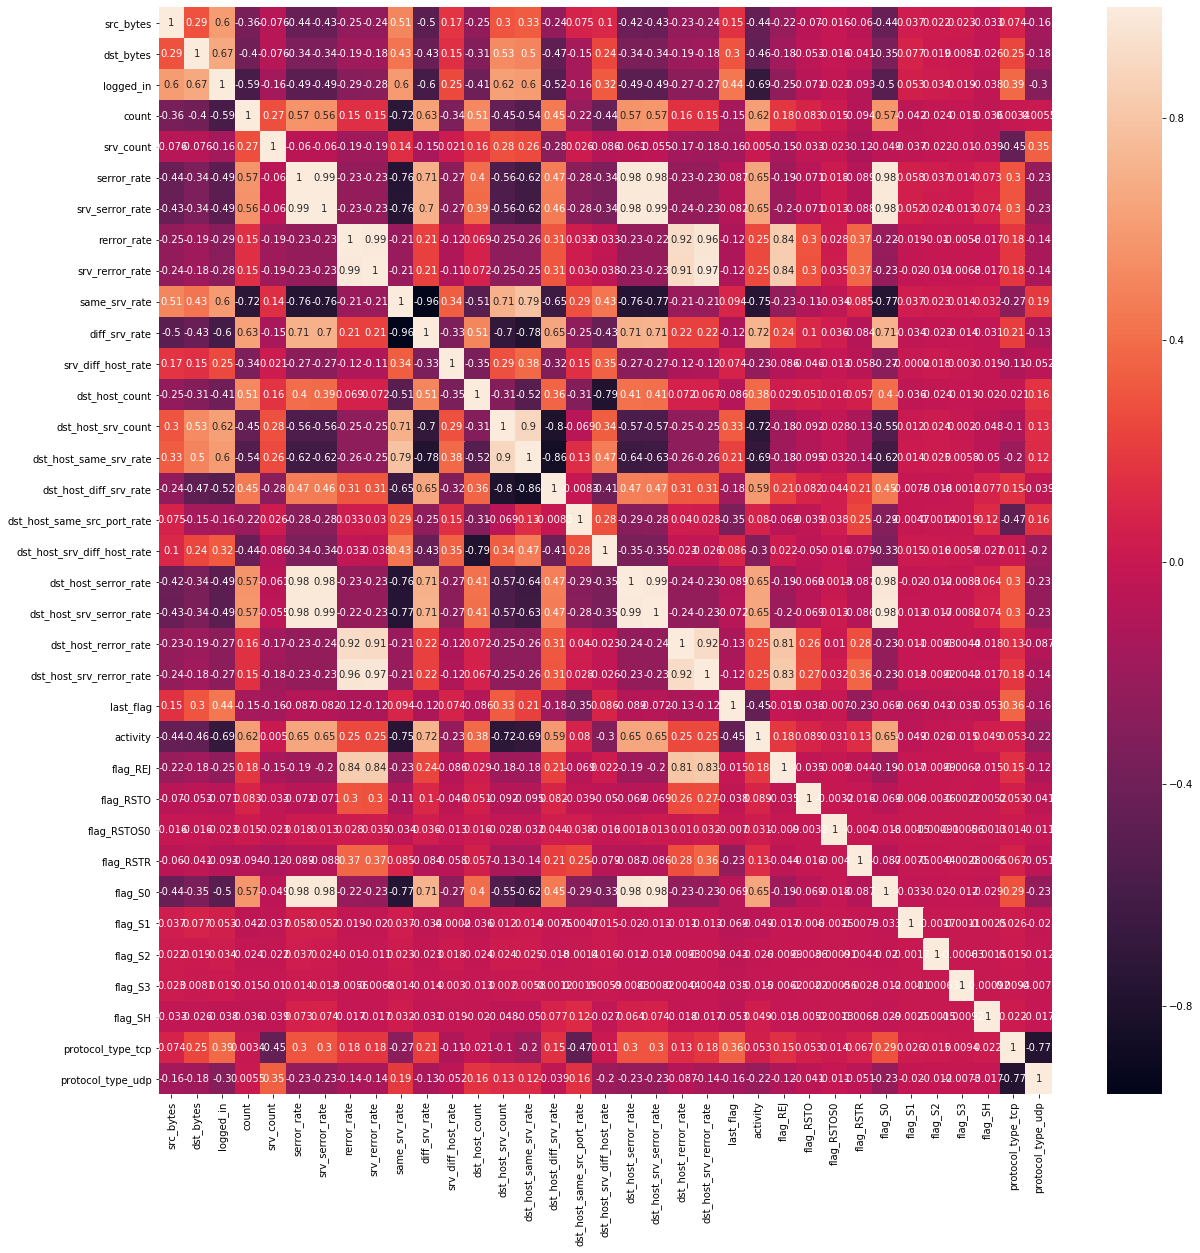

In [70]:
plt.figure(figsize = (20, 20))
sns.heatmap(df2.corr(),annot=True)

### <a>Binomial Classification-

In [71]:
### MODEL BUILDING
### LOGISTIC REGRESSION TECHNIQUE

In [72]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split  

train, test = train_test_split(df2, test_size = 0.30, random_state = 42)

In [73]:
train.shape

(88181, 35)

In [74]:
test.shape

(37792, 35)

In [75]:
df2.columns

Index(['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'last_flag', 'activity', 'flag_REJ',
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SH', 'protocol_type_tcp',
       'protocol_type_udp'],
      dtype='object')

In [76]:
### Using Corelation,VIF and Ols method -The following attributes selected-

In [77]:
# Feature selection

feature_cols = df2.columns.difference( ['src_bytes','logged_in','flag_SH','activity','flag_RSTOS0','count','rerror_rate',
                                       'serror_rate','srv_rerror_rate','flag_S0','dst_host_srv_serror_rate',
                                       'dst_host_srv_rerror_rate','dst_host_same_srv_rate',
                                       'dst_host_serror_rate','diff_srv_rate'])


In [78]:
my_formula = "activity ~ " + "+".join(feature_cols)

In [79]:
# importing the required libraries for model building
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression

lm = sm.ols(formula = my_formula, data = train).fit()

In [80]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               activity   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 2.471e+04
Date:                Sat, 21 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:06:31   Log-Likelihood:                 19470.
No. Observations:               88181   AIC:                        -3.890e+04
Df Residuals:                   88160   BIC:                        -3.870e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.1247      0.012    176.576      0.000       2.101       2.148
dst_bytes                     3.74e-05   8.07e-07     46.360      0.000    3.58e-05     3.9e-05
dst_host_count                  0.0003   1.22e-05     21.047      0.000       0.000       0.000
dst_host_diff_srv_rate          0.9732      0.034     28.235      0.000       0.906       1.041
dst_host_rerror_rate            0.3166      0.006     49.476      0.000       0.304       0.329
dst_host_same_src_port_rate     0.2219      0.004     61.895      0.000       0.215       0.229
dst_host_srv_count             -0.0005    1.3e-05    -37.673      0.000      -0.001      -0.000
dst_host_srv_diff_host_rate    -0.2196      0.065     -3.369      0.001      -0.347      -0.092
flag_REJ                        0.1512      0.006     26.835      0.000       0.140       0.162
flag_RSTO                       0.1820      0.008     23.684      0.000       0.167       0.197
flag_RSTR                       0.2506      0.007     37.840      0.000       0.238       0.264
flag_S1                        -0.6440      0.013    -50.964      0.000      -0.669      -0.619
flag_S2                        -0.4746      0.021    -23.143      0.000      -0.515      -0.434
flag_S3                        -0.5709      0.033    -17.107      0.000      -0.636      -0.505
last_flag                      -0.0687      0.001   -119.346      0.000      -0.070      -0.068
protocol_type_tcp              -0.4288      0.004   -105.122      0.000      -0.437      -0.421
protocol_type_udp              -0.5342      0.004   -140.396      0.000      -0.542      -0.527
same_srv_rate                  -0.3291      0.004    -88.305      0.000      -0.336      -0.322
srv_count                       0.0042   6.85e-05     60.930      0.000       0.004       0.004
srv_diff_host_rate              0.1446      0.007     19.793      0.000       0.130       0.159
srv_serror_rate                 0.5172      0.003    148.166      0.000       0.510       0.524
==============================================================================
Omnibus:                    10272.395   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97629.200
Skew:                          -0.167   Prob(JB):                         0.00
Kurtosis:                       8.144   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# importing required libraries and funciton for variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [82]:
a, b = dmatrices(my_formula, train ,return_type = 'dataframe')

vif = pd.DataFrame()

vif['features'] = b.columns

vif['VIF score'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]

In [83]:
vif.sort_values(['VIF score'], ascending = False)

,features,VIF score
0,Intercept,339.036014
4,dst_host_rerror_rate,6.790478
17,same_srv_rate,6.216383
8,flag_REJ,6.041284
15,protocol_type_tcp,5.875459
20,srv_serror_rate,5.689999
6,dst_host_srv_count,4.850605
3,dst_host_diff_srv_rate,3.746787
16,protocol_type_udp,3.581759
2,dst_host_count,3.340621


In [84]:
## Hence,it is good to go. 

In [85]:
train['pred_prob'] = lm.predict(train)
train.head()

,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SH,protocol_type_tcp,protocol_type_udp,pred_prob
49911,0,0.0,0,1,2,0.0,0.0,1.0,1.0,1.00,...,0,0,0,0,0,0,0,1,0,0.362980
46670,0,0.0,0,33,15,1.0,1.0,0.0,0.0,0.45,...,0,0,1,0,0,0,0,1,0,0.820469
100564,230,3375.8,1,6,6,0.0,0.0,0.0,0.0,1.00,...,0,0,0,0,0,0,0,1,0,-0.043491
51601,567,0.0,1,1,1,0.0,0.0,0.0,0.0,1.00,...,0,0,0,0,0,0,0,1,0,-0.032988
123170,848,3375.8,0,1,1,0.0,0.0,1.0,1.0,1.00,...,0,1,0,0,0,0,0,1,0,0.510763


In [86]:
test['pred_prob'] = lm.predict(test)
test.head()

,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SH,protocol_type_tcp,protocol_type_udp,pred_prob
378,36,0.0,0,2,4,0.0,0.0,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,-0.002678
32038,0,0.0,0,42,11,1.0,1.0,0.0,0.0,0.26,...,0,0,1,0,0,0,0,1,0,1.031285
86399,0,0.0,0,256,20,1.0,1.0,0.0,0.0,0.07,...,0,0,1,0,0,0,0,1,0,0.944470
74412,0,0.0,0,110,8,0.0,0.0,1.0,1.0,0.07,...,0,0,0,0,0,0,0,1,0,0.938051
52951,0,0.0,0,1,1,0.0,0.0,1.0,1.0,1.00,...,0,1,0,0,0,0,0,1,0,0.925553


#### CHECK MODEL ACCURACY

In [87]:
from sklearn.metrics import roc_auc_score, accuracy_score

print('roc_auc_score of training dataset:', roc_auc_score(train['activity'], train['pred_prob']))
print('roc_auc_score of testing dataset:', roc_auc_score(test['activity'], test['pred_prob']))


roc_auc_score of training dataset: 0.992555585076384
roc_auc_score of testing dataset: 0.9923964539200265


In [88]:
## As ROC AUC SCORE is coming out to be good in training and testing dataset. Hence, we can consider our model good.

#### <a>FOR CUT-OFF
#### DECILE ANALYSIS

In [89]:
train['deciles'] = pd.qcut(train.pred_prob, 10, labels = False)

In [90]:
min_prob = train.groupby(train.deciles)['deciles', 'pred_prob'].min().round(2).sort_index(ascending=False)['pred_prob']
max_prob = train.groupby(train.deciles)['deciles', 'pred_prob'].max().round(2).sort_index(ascending=False)['pred_prob']
total_count = train.groupby(train.deciles)['deciles', 'activity'].count().round(2).sort_index(ascending=False)['activity']
no_1s = train.groupby(train.deciles)['deciles', 'activity'].sum().round(2).sort_index(ascending=False)['activity']


In [91]:
deciles_analysis_test = pd.concat([min_prob, max_prob, no_1s, total_count - no_1s, total_count], axis = 1)
deciles_analysis_test.columns = ['min_prob', 'max_prob', '#1s', '#0s', 'total']
deciles_analysis_test = deciles_analysis_test.reset_index()
deciles_analysis_test['perc_D'] = round((deciles_analysis_test['#1s'] * 100) / deciles_analysis_test['#1s'].sum(), 2)
deciles_analysis_test['perc_ND'] = round((deciles_analysis_test['#0s'] * 100) / deciles_analysis_test['#0s'].sum(), 2)
deciles_analysis_test

,deciles,min_prob,max_prob,#1s,#0s,total,perc_D,perc_ND
0,9,1.04,1.47,8810,8,8818,21.53,0.02
1,8,0.97,1.04,8781,30,8811,21.46,0.06
2,7,0.91,0.97,8636,189,8825,21.10,0.40
3,6,0.80,0.91,8708,110,8818,21.28,0.23
4,5,0.33,0.80,5203,3615,8818,12.71,7.65
5,4,0.14,0.33,778,8030,8808,1.90,16.99
6,3,0.04,0.14,1,8827,8828,0.00,18.68
7,2,-0.01,0.04,0,8818,8818,0.00,18.66
8,1,-0.06,-0.01,2,8815,8817,0.00,18.65
9,0,-0.69,-0.06,2,8818,8820,0.00,18.66


In [92]:
deciles_analysis_test['cum_perc_D'] = deciles_analysis_test.perc_D.cumsum()
deciles_analysis_test['cum_perc_ND'] = deciles_analysis_test.perc_ND.cumsum()
deciles_analysis_test

,deciles,min_prob,max_prob,#1s,#0s,total,perc_D,perc_ND,cum_perc_D,cum_perc_ND
0,9,1.04,1.47,8810,8,8818,21.53,0.02,21.53,0.02
1,8,0.97,1.04,8781,30,8811,21.46,0.06,42.99,0.08
2,7,0.91,0.97,8636,189,8825,21.10,0.40,64.09,0.48
3,6,0.80,0.91,8708,110,8818,21.28,0.23,85.37,0.71
4,5,0.33,0.80,5203,3615,8818,12.71,7.65,98.08,8.36
5,4,0.14,0.33,778,8030,8808,1.90,16.99,99.98,25.35
6,3,0.04,0.14,1,8827,8828,0.00,18.68,99.98,44.03
7,2,-0.01,0.04,0,8818,8818,0.00,18.66,99.98,62.69
8,1,-0.06,-0.01,2,8815,8817,0.00,18.65,99.98,81.34
9,0,-0.69,-0.06,2,8818,8820,0.00,18.66,99.98,100.00


In [93]:
# analysing this table then I can see that in 'cum_perc_D' if I take assurity of 98.08% then my cut off is coming 0.33.
# hence from decile analysis on training dataset I can take cut off of 0.33.

In [94]:
test['deciles'] = pd.qcut(test.pred_prob, 10, labels = False)

min_prob_test = test.groupby(test.deciles)['deciles', 'pred_prob'].min().round(2).sort_index(ascending=False)['pred_prob']
max_prob_test = test.groupby(test.deciles)['deciles', 'pred_prob'].max().round(2).sort_index(ascending=False)['pred_prob']
total_count_test = test.groupby(test.deciles)['deciles', 'activity'].count().round(2).sort_index(ascending=False)['activity']
no_1s_test = test.groupby(test.deciles)['deciles', 'activity'].sum().round(2).sort_index(ascending=False)['activity']

deciles_analysis_test_2 = pd.concat([min_prob_test, max_prob_test, no_1s_test, total_count_test - no_1s_test, total_count_test], axis = 1)

deciles_analysis_test_2.columns = ['min_prob', 'max_prob', '#1s', '#0s', 'total']

deciles_analysis_test_2 = deciles_analysis_test_2.reset_index() 

deciles_analysis_test_2['perc_D'] = round((deciles_analysis_test_2['#1s'] * 100) / deciles_analysis_test_2['#1s'].sum(), 2)
deciles_analysis_test_2['perc_ND'] = round((deciles_analysis_test_2['#0s'] * 100) / deciles_analysis_test_2['#0s'].sum(), 2)


deciles_analysis_test_2['cum_perc_D'] = deciles_analysis_test_2.perc_D.cumsum()
deciles_analysis_test_2['cum_perc_ND'] = deciles_analysis_test_2.perc_ND.cumsum()

deciles_analysis_test_2

# analysing this table and of 97.94% taking cut off i.e 0.34
# hence from decile analysis on testing dataset I can take cut off of 0.34.

,deciles,min_prob,max_prob,#1s,#0s,total,perc_D,perc_ND,cum_perc_D,cum_perc_ND
0,9,1.04,1.50,3765,7,3772,21.26,0.03,21.26,0.03
1,8,0.97,1.04,3776,11,3787,21.32,0.05,42.58,0.08
2,7,0.91,0.97,3701,78,3779,20.90,0.39,63.48,0.47
3,6,0.81,0.91,3720,59,3779,21.01,0.29,84.49,0.76
4,5,0.34,0.81,2381,1398,3779,13.45,6.96,97.94,7.72
5,4,0.15,0.34,364,3415,3779,2.06,17.00,100.00,24.72
6,3,0.04,0.15,1,3778,3779,0.01,18.81,100.01,43.53
7,2,-0.01,0.04,0,3779,3779,0.00,18.82,100.01,62.35
8,1,-0.06,-0.01,0,3779,3779,0.00,18.82,100.01,81.17
9,0,-0.58,-0.06,1,3779,3780,0.01,18.82,100.02,99.99


#### KS Score -test

In [95]:
deciles_analysis_test_2['KS_Score'] = deciles_analysis_test_2['cum_perc_D'] - deciles_analysis_test_2['cum_perc_ND']

deciles_analysis_test_2

# Now as I can see KS score of testing dataset, the maximum value lies in the first 5 columns i.e.90.22.
# which is a good sign that our model is good
# so my cut off came out to be 0.34 from testing data as well

,deciles,min_prob,max_prob,#1s,#0s,total,perc_D,perc_ND,cum_perc_D,cum_perc_ND,KS_Score
0,9,1.04,1.50,3765,7,3772,21.26,0.03,21.26,0.03,21.23
1,8,0.97,1.04,3776,11,3787,21.32,0.05,42.58,0.08,42.50
2,7,0.91,0.97,3701,78,3779,20.90,0.39,63.48,0.47,63.01
3,6,0.81,0.91,3720,59,3779,21.01,0.29,84.49,0.76,83.73
4,5,0.34,0.81,2381,1398,3779,13.45,6.96,97.94,7.72,90.22
5,4,0.15,0.34,364,3415,3779,2.06,17.00,100.00,24.72,75.28
6,3,0.04,0.15,1,3778,3779,0.01,18.81,100.01,43.53,56.48
7,2,-0.01,0.04,0,3779,3779,0.00,18.82,100.01,62.35,37.66
8,1,-0.06,-0.01,0,3779,3779,0.00,18.82,100.01,81.17,18.84
9,0,-0.58,-0.06,1,3779,3780,0.01,18.82,100.02,99.99,0.03


In [96]:
##Accoring to decile analysis cut off should be 0.49 as the KS score is max at 0.34 i.e 90.22.

In [97]:
##CONFUSION MATRIX
from sklearn import metrics
cm = metrics.confusion_matrix(train['activity'], train['pred_prob'] > 0.34, [1, 0])
cm

array([[40065,   856],
       [ 3842, 43418]], dtype=int64)

In [98]:
train['predicted'] = train['pred_prob'].apply(lambda x: 1 if x > 0.34 else 0)
test['predicted'] = test['pred_prob'].apply(lambda x: 1 if x > 0.34 else 0)

train = train.dropna().reset_index(drop = True)
test = test.dropna().reset_index(drop = True)

In [99]:
pd.crosstab(train['activity'], train['predicted'])

predicted,0,1
activity,,
0,43418,3842
1,856,40065


In [100]:
pd.crosstab(test['activity'], test['predicted'])

predicted,0,1
activity,,
0,18451,1632
1,345,17364


In [101]:
### Accuracy of the model.

In [102]:
print("The overall accuracy score for the Train Data is : ", accuracy_score(train.activity, train.predicted))
print("The overall accuracy score for the Test Data  is : ", accuracy_score(test.activity, test.predicted))

The overall accuracy score for the Train Data is :  0.9467232170195393
The overall accuracy score for the Test Data  is :  0.9476873412362404


In [103]:
print('ROC AUC score of train data:', roc_auc_score(train.activity, train.predicted))
print('ROC AUC score of test data:', roc_auc_score(test.activity, test.predicted))

ROC AUC score of train data: 0.948893340546155
ROC AUC score of test data: 0.9496278104683116


In [104]:
test_new.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


#### For test dataset

In [105]:
test_final['prob'] = lm.predict(test_final)
test_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp,prob
0,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.868081
1,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.837236
2,2,1032,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.089994
3,0,20,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.148977
4,1,0,15.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.244265


In [106]:
test_final['activity'] = test_final['prob'].apply(lambda x: 1 if x > 0.34 else 0)

In [107]:
test_final.activity.value_counts()

1    12386
0    10158
Name: activity, dtype: int64

>Network Intrusion Detection System Detected 12386 Anomalities And Attacks in the network.

#### <a>Multinomial Classification-

In [108]:
# Bringing back the 'attack' variable for classification

train_final['attack'] = train_new['attack']

In [109]:
train_final['attack_class'] = np.where((train_final['attack'] .isin(['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']) == True), 'DoS', 
                                   np.where((train_final['attack'] .isin(['ipsweep', 'nmap', 'portsweep']) == True), 'Probe',
                                        np.where((train_final['attack'] .isin(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy']) == True), 'R2L',
                                             np.where((train_final['attack'] .isin(['buffer_overflow', 'loadmodule', 'rootkit', 'perl']) == True), 'U2R', 'Normal'))))

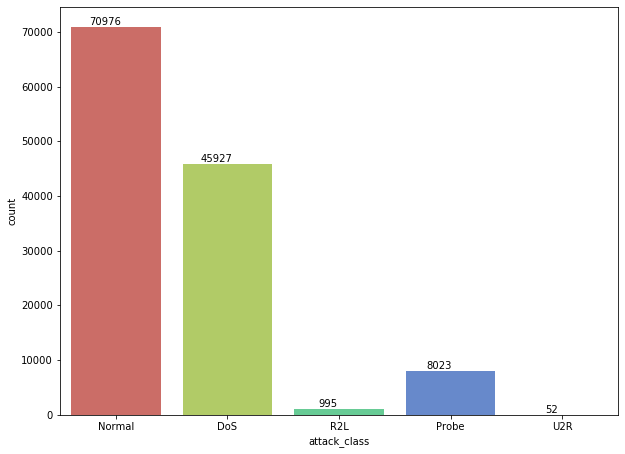

In [110]:
graph = sns.countplot(x = 'attack_class', data = train_final, palette = 'hls')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [111]:
# Assigning numeric values to attack class for model building

train_final['attack_class_num'] = np.where((train_final['attack_class'] == 'Normal'), 0, 
                                        np.where((train_final['attack_class'] == 'DoS'), 1, 
                                            np.where((train_final['attack_class'] == 'Probe'), 2, 
                                                 np.where((train_final['attack_class'] == 'R2L'), 3, 
                                                        np.where((train_final['attack_class'] == 'U2R'), 4, ''))))) 

In [112]:
train_final['attack_class_num'].unique()

array(['0', '1', '3', '2', '4'], dtype=object)

In [113]:
# Feature selection

feature_cols =train_final.columns.difference(['activity', 'attack', 'attack_class', 'attack_class_num'])
feature_cols

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_serror_rate', 'duration', 'flag_REJ', 'flag_RSTO',
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'hot', 'is_guest_login', 'is_host_login', 'land',
       'last_flag', 'logged_in', 'num_access_files', 'num_compromised',
       'num_failed_logins', 'num_file_creations', 'num_outbound_cmds',
       'num_root', 'num_shells', 'protocol_type_tcp', 'protocol_type_udp',
       'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate',
       'srv_serror_rate', 'su_attempted', 'urgent', 'wrong_fragment'],
      dtype='object')

In [114]:
X = train_final[feature_cols]         # feature variables
y = train_final['attack_class_num']   # Target variable

In [115]:
# Splitting 70% of the data to training set while 30% of the data to test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [116]:
# Instantiating the Logistic Regression model using default and using fit() function to train your model.

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# Now that we have trained our algorithm, it’s time to make some predictions.

y_pred = logreg.predict(X_test)

In [118]:
# Model Evaluation using Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19675,  1426,    72,     0,     0],
       [ 1232, 12454,   139,     0,     0],
       [ 1085,   408,   957,     0,     0],
       [  314,     9,     2,     0,     2],
       [   12,     2,     0,     0,     3]], dtype=int64)

In [119]:
# checking the accuracy of the model.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8755556731583404


In [120]:
# checking how much area is under the ROC curve

from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.7155068718440497


In [121]:
y_test.unique()

array(['0', '1', '2', '3', '4'], dtype=object)

##### APPLYING THIS MODEL ON TESTING DATASET TO PREDICT WHETHER THE ACTIVITY IS NORMAL OR DOS OR PROBE OR R2L OR U2R

In [122]:
test_final = test_final[feature_cols]

In [123]:
# Now that we have trained our algorithm, it’s time to make some predictions.

test_final['y_pred'] = logreg.predict(test_final)

In [124]:
test_final['y_pred'] .unique()

array(['1', '0', '2', '4'], dtype=object)

In [125]:
# Assigning orignal names to attack class

test_final['attack_class'] = np.where((test_final['y_pred'] == '0'), 'Normal', 
                                      np.where((test_final['y_pred'] == '1'), 'DoS', 
                                               np.where((test_final['y_pred'] == '2'), 'Probe', 
                                                     np.where((test_final['y_pred'] == '3'), 'R2L', 
                                                              np.where((test_final['y_pred'] == '4'), 'U2R', '')))))


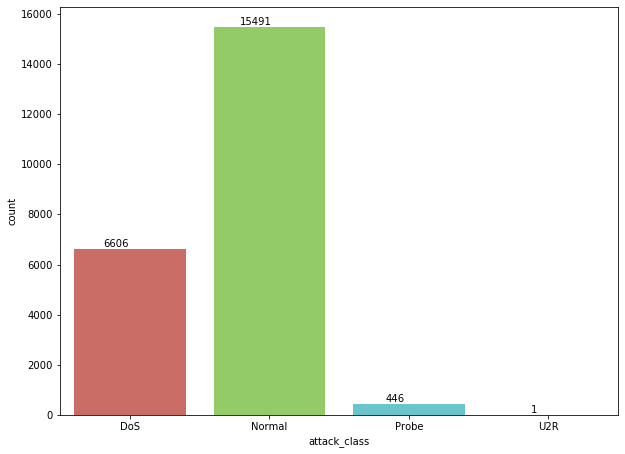

In [126]:
# Graphical representation of attack class
# Exploring the target data and visualizing it.

graph = sns.countplot(x = 'attack_class', data = test_final, palette = 'hls')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',color= 'black')

In [127]:
test_final.attack_class.value_counts()

Normal    15491
DoS        6606
Probe       446
U2R           1
Name: attack_class, dtype: int64

In [128]:
values = test_final.attack_class.value_counts()
values

Normal    15491
DoS        6606
Probe       446
U2R           1
Name: attack_class, dtype: int64

In [129]:
# Percentage of every Activity classs in the data

for i in range(0,4):
    x = ((values[i]*100)/values.sum()).round(2)
    print(i, 'group is about', x, '% of the customer database')

0 group is about 68.71 % of the customer database
1 group is about 29.3 % of the customer database
2 group is about 1.98 % of the customer database
3 group is about 0.0 % of the customer database


> #### THEREFORE, OUR NETWORK INTRUSION DETECTION SYSTEM DETECTED VARIOUS ACTIVITIES IN THE NETWORK :-

15491 Normal Activity which is 68.71% of total activities in the network.

6606 DoS Activity which is 29.3% of total activities in the network.

446 Probe Activity which is 1.98% of total activities in the network.

01 U2R Activity which is 0.00% of total activities in the network.